In [1]:
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric
import pandas as pd

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


## Read dataset and pre processing

### Read Covid-19 cases


In [2]:
df = pd.read_csv('Datasets/covid_19_cases/COVID-19 Activity.csv')

Este dataset pode ser encontrado em: https://data.world/covid-19-data-resource-hub/covid-19-case-counts

O download do arquivo utilizado neste estudo foi realizado em: 10/06/2020

### Prepare Dataframes

In [3]:
df['REPORT_DATE'] = pd.to_datetime(df['REPORT_DATE'], format='%m/%d/%Y')

In [4]:
df_br = df[df['COUNTRY_ALPHA_2_CODE'] =='BR']

In [5]:
df_br_cases = df_br.loc[:, df_br.columns.intersection([
                                         'REPORT_DATE', 
                                         'PEOPLE_POSITIVE_NEW_CASES_COUNT'])]

In [6]:
df_br_deaths = df_br.loc[:, df_br.columns.intersection([
                                         'REPORT_DATE', 
                                         'PEOPLE_DEATH_NEW_COUNT'])]

In [7]:
df_br_deaths = df_br.rename(columns={'REPORT_DATE':'ds','PEOPLE_DEATH_NEW_COUNT':'y'})

In [8]:
df_br_cases = df_br.rename(columns={'REPORT_DATE':'ds','PEOPLE_POSITIVE_NEW_CASES_COUNT':'y'})

## Predict

### Cases

In [9]:
cases_model = Prophet(daily_seasonality=True)

In [10]:
cases_model.fit(df_br_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


### Cases after 30 days

In [11]:
future_cases = cases_model.make_future_dataframe(periods=30)

In [12]:
forecast_cases = cases_model.predict(future_cases)
forecast_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
163,2020-06-11,27549.531907,24734.811537,30275.328985
164,2020-06-12,28330.906573,25605.657829,31118.135943
165,2020-06-13,28876.568144,25904.238312,31572.836065
166,2020-06-14,29147.109588,26189.979965,31809.367641
167,2020-06-15,27765.153035,24961.160003,30582.611747
168,2020-06-16,27987.213147,25333.725794,31073.377593
169,2020-06-17,30421.223898,27542.402996,33207.973500
170,2020-06-18,31212.504428,28466.894309,33898.503015
171,2020-06-19,31993.879094,29184.194327,34910.583383
172,2020-06-20,32539.540665,29926.469401,35316.623512


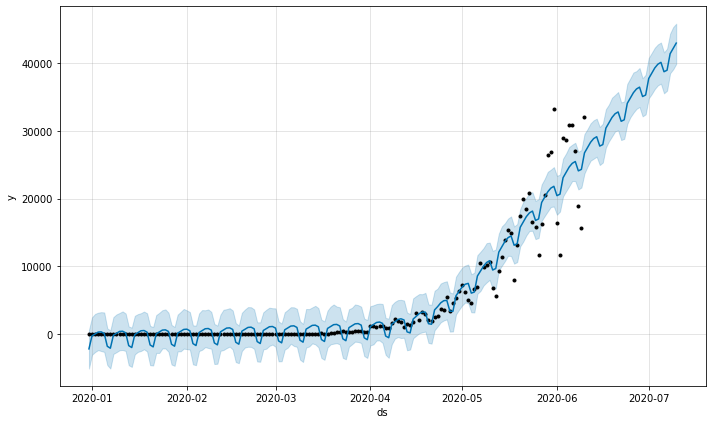

In [13]:
cases_graph = cases_model.plot(forecast_cases)

In [14]:
df_cv = cross_validation(cases_model, horizon=30)
df_cv.head()

INFO:fbprophet:Making 155 forecasts with cutoffs between 2020-01-07 23:59:59.999999970 and 2020-06-09 23:59:59.999999970
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.
INFO:fbprophet:n_changepoints greater than number of observations.Using 8.
INFO:fbprophet:n_changepoints greater than number of observations.Using 9.
INFO:fbprophet:n_changepoints greater than number of observations.Using 10.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:n_changepoints greater than number of observations.Using 12.
INFO:fbprophet:n_changepoints greater than number of observations.Using 13.
INFO:fbprophet:n_changepoints greater than number

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-01-08,0.0,-1.651646e-09,1.592634e-09,0,2020-01-07 23:59:59.999999970
1,2020-01-09,0.0,-1.470258e-09,1.628497e-09,0,2020-01-08 23:59:59.999999970
2,2020-01-10,0.0,-1.614915e-09,1.485383e-09,0,2020-01-09 23:59:59.999999970
3,2020-01-11,0.0,-1.462034e-09,1.371185e-09,0,2020-01-10 23:59:59.999999970
4,2020-01-12,0.0,-1.465059e-09,1.428801e-09,0,2020-01-11 23:59:59.999999970


In [15]:
df_p = performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0


TypeError: 'NoneType' object is not subscriptable

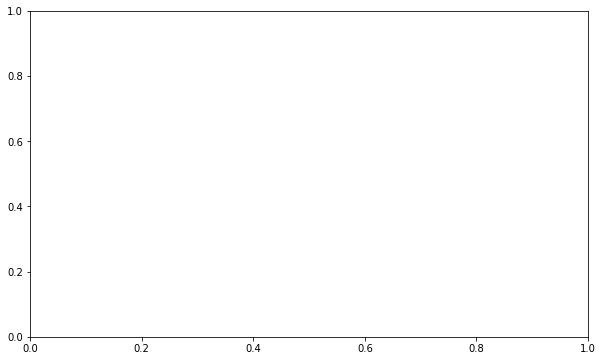

In [16]:
mape = plot_cross_validation_metric(df_cv, metric='mape')

#### Cases after 6 months

In [17]:
future_cases = cases_model.make_future_dataframe(periods=180)

In [18]:
forecast_cases = cases_model.predict(future_cases)
forecast_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(180)

,ds,yhat,yhat_lower,yhat_upper
163,2020-06-11,27549.531907,24966.991939,30488.079286
164,2020-06-12,28330.906573,25445.309177,31229.138473
165,2020-06-13,28876.568144,26076.564088,31779.410378
166,2020-06-14,29147.109588,26345.906068,31828.613613
167,2020-06-15,27765.153035,25060.909332,30774.488991
...,...,...,...,...
338,2020-12-03,119123.844932,99099.821174,136788.879689
339,2020-12-04,119905.219598,99574.181222,137656.105398
340,2020-12-05,120450.881169,100327.752075,138751.771419
341,2020-12-06,120721.422614,99627.644748,139177.406464


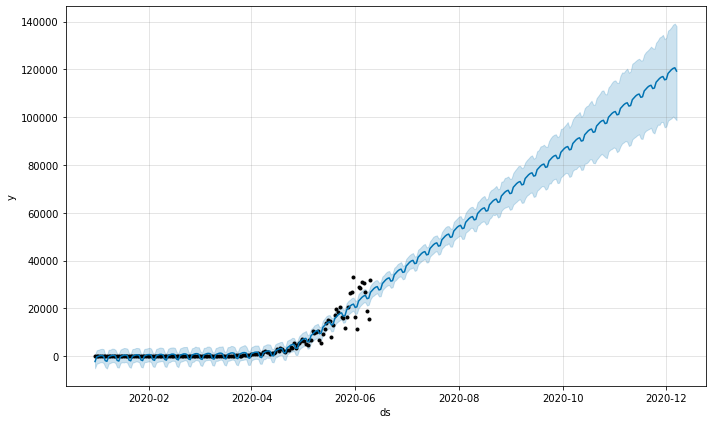

In [19]:
cases_graph = cases_model.plot(forecast_cases)

In [20]:
df_cv = cross_validation(cases_model, horizon=180)
df_cv.head()

INFO:fbprophet:Making 155 forecasts with cutoffs between 2020-01-07 23:59:59.999999820 and 2020-06-09 23:59:59.999999820
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.
INFO:fbprophet:n_changepoints greater than number of observations.Using 8.
INFO:fbprophet:n_changepoints greater than number of observations.Using 9.
INFO:fbprophet:n_changepoints greater than number of observations.Using 10.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:n_changepoints greater than number of observations.Using 12.
INFO:fbprophet:n_changepoints greater than number of observations.Using 13.
INFO:fbprophet:n_changepoints greater than number

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-01-08,0.0,-1.796114e-09,1.600885e-09,0,2020-01-07 23:59:59.999999820
1,2020-01-09,0.0,-1.529511e-09,1.571695e-09,0,2020-01-08 23:59:59.999999820
2,2020-01-10,0.0,-1.546062e-09,1.471809e-09,0,2020-01-09 23:59:59.999999820
3,2020-01-11,0.0,-1.390053e-09,1.494540e-09,0,2020-01-10 23:59:59.999999820
4,2020-01-12,0.0,-1.466090e-09,1.411121e-09,0,2020-01-11 23:59:59.999999820


In [21]:
df_p = performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0


TypeError: 'NoneType' object is not subscriptable

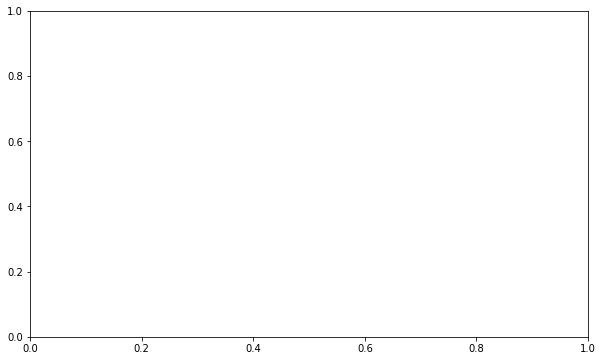

In [22]:
mape = plot_cross_validation_metric(df_cv, metric='mape')

### Deaths

In [23]:
deaths_model = Prophet(daily_seasonality=True)

In [24]:
deaths_model.fit(df_br_deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


#### Deaths in 30 days

In [25]:
future_deaths = deaths_model.make_future_dataframe(periods=30)

In [26]:
forecast_deaths = deaths_model.predict(future_deaths)
forecast_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
163,2020-06-11,1161.302297,1023.981825,1305.442570
164,2020-06-12,1207.370042,1070.307309,1345.350337
165,2020-06-13,1190.319922,1053.072124,1329.044492
166,2020-06-14,1183.249024,1041.109787,1315.522139
167,2020-06-15,1101.049314,954.808838,1235.560515
168,2020-06-16,1146.109850,1006.370862,1286.117775
169,2020-06-17,1285.651928,1151.351918,1417.861518
170,2020-06-18,1278.887495,1140.984033,1415.860314
171,2020-06-19,1324.955240,1193.504767,1466.187803
172,2020-06-20,1307.905121,1175.063318,1448.832156


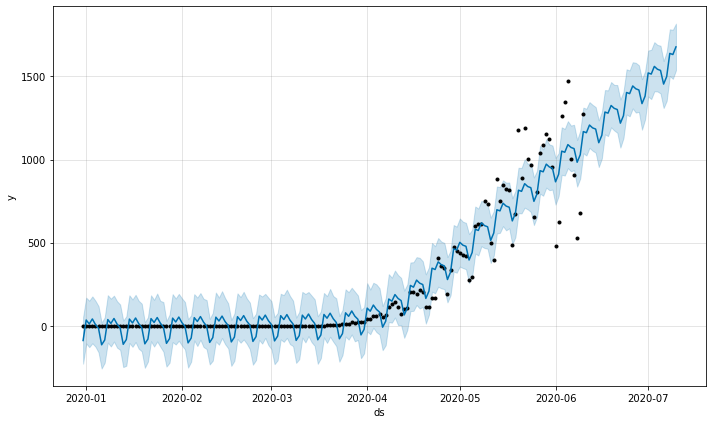

In [27]:
deaths_graph = deaths_model.plot(forecast_deaths)

In [28]:
df_cv = cross_validation(deaths_model, horizon=30)
df_cv.head()

INFO:fbprophet:Making 155 forecasts with cutoffs between 2020-01-07 23:59:59.999999970 and 2020-06-09 23:59:59.999999970
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.
INFO:fbprophet:n_changepoints greater than number of observations.Using 8.
INFO:fbprophet:n_changepoints greater than number of observations.Using 9.
INFO:fbprophet:n_changepoints greater than number of observations.Using 10.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:n_changepoints greater than number of observations.Using 12.
INFO:fbprophet:n_changepoints greater than number of observations.Using 13.
INFO:fbprophet:n_changepoints greater than number

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-01-08,0.0,-1.458147e-09,1.550830e-09,0,2020-01-07 23:59:59.999999970
1,2020-01-09,0.0,-1.632872e-09,1.467131e-09,0,2020-01-08 23:59:59.999999970
2,2020-01-10,0.0,-1.541831e-09,1.569996e-09,0,2020-01-09 23:59:59.999999970
3,2020-01-11,0.0,-1.415601e-09,1.594173e-09,0,2020-01-10 23:59:59.999999970
4,2020-01-12,0.0,-1.494504e-09,1.419064e-09,0,2020-01-11 23:59:59.999999970


In [29]:
df_p = performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0


TypeError: 'NoneType' object is not subscriptable

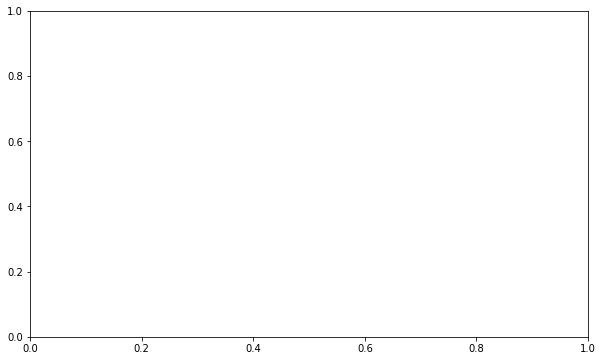

In [30]:
mape = plot_cross_validation_metric(df_cv, metric='mape')

#### Deaths in 6 months

In [ ]:
future_deaths = deaths_model.make_future_dataframe(periods=180)

In [ ]:
forecast_deaths = deaths_model.predict(future_deaths)
forecast_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(180)

In [ ]:
deaths_graph = deaths_model.plot(forecast_deaths)

In [ ]:
df_cv = cross_validation(deaths_model, horizon=180)
df_cv.head()

In [ ]:
df_p = performance_metrics(df_cv)

In [ ]:
mape = plot_cross_validation_metric(df_cv, metric='mape')